# LASSO REGRESYON

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt 
from sklearn.linear_model import RidgeCV, LassoCV

In [4]:
df = pd.read_csv("verisetleri\Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [6]:
df.shape

(263, 20)

In [7]:
 lasso_model = Lasso().fit(X_train, y_train)

In [8]:
lasso_model.intercept_

-5.587450677336506

In [9]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [10]:
# farklı lambda değerlerine karşılık katsayılar

In [15]:
lasso = Lasso()
coefs = []
# alphas = np.random.randint(0, 100000, 10) # önce bu katsayılarla uygulama yapıldı. 
alphas = 10**np.linspace(10, -2, 100)*0.5
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

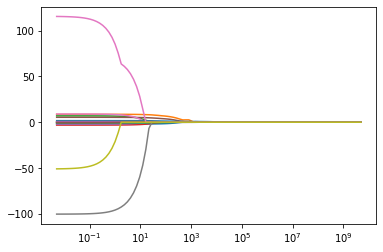

In [16]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")

In [17]:
# Lasso katsayılar sonunda 0(sıfır)lanmaktadır. Ridge ise 0 a yaklaşmakta fakat 0 a eşitlenmemekteydi. 

## TAHMİN

In [18]:
lasso_model

Lasso()

In [19]:
lasso_model.predict(X_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [20]:
lasso_model.predict(X_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [21]:
y_pred = lasso_model.predict(X_test)

In [22]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.0975884554033

In [23]:
# r2_score : Modelin açıklanabilirliğini ifade etmektedir.
# Yani bağımsiz değişkenlerin bağımlı değişkendeki değişikliğin yüzde kaçını açıkladığını ifade etmektedir. Regresyon problemleri için çok çok değerli bir ölçüttür. Kendisine bakarak kurulmuş olan modelin açıklama gücü incelenir. 
r2_score(y_test,y_pred)

0.4142279813236618

## MODEL TUNNING
#### Optimum lambda ( alpha ) değerinin bulunması

In [24]:
lasso_cv_model = LassoCV(cv=10, max_iter=100000).fit(X_train, y_train)

In [25]:
lasso_cv_model.alpha_

563.4670501833854

In [26]:
# Final modeli ile modeli oluşturma

In [27]:
lasso_tuned = Lasso().set_params(alpha=lasso_cv_model.alpha_).fit(X_train, y_train)

In [28]:
# lasso_tuned = Lasso(alpha=lasso_cv_model.alpha).fit(X_train, y_train) # Yukarıdaki kod ile aynı işlemi yapar.

In [29]:
y_pred = lasso_tuned.predict(X_test)

In [30]:
np.sqrt(mean_squared_error(y_test, y_pred))

373.5957225069794

In [38]:
# lambda değerleri vererek modeli yeniden oluşturma

In [44]:
alphas = 10**np.linspace(10, -2, 100)*0.5
lasso_cv_model_lambda = LassoCV(alphas=alphas, cv=10, max_iter=100000).fit(X_train, y_train)

In [45]:
lasso_cv_model_lambda.alpha_

201.85086292982749

In [46]:
lasso_tuned_lambda = Lasso(alpha=lasso_cv_model_lambda.alpha_).fit(X_train, y_train)

In [47]:
y_pred_lambda = lasso_tuned_lambda.predict(X_test)

In [49]:
np.sqrt(mean_squared_error(y_test, y_pred_lambda))

363.6832708037447

In [50]:
# Tune edilmiş değişkenlerin katsayılarını değişken isimleriyle listelenmesi. Burada 0 yapılan değişken katsayılarını görebiliriz. Bunların maaşa etkisi 0 demektir. Anlamsızdırlar artık. 
pd.Series(lasso_tuned_lambda.coef_, index = X_train.columns)

AtBat         -1.052276
Hits           5.342648
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.640006
Years          0.000000
CAtBat        -0.174125
CHits          0.249805
CHmRun        -0.000000
CRuns          1.035075
CRBI           0.469281
CWalks        -0.186771
PutOuts        0.272541
Assists        0.170528
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

In [ ]:
# Son